# Long Short-Term Memory (LSTM) Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2006-01-01'
end = '30-01-2022'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,2.669643,2.580357,2.585000,2.669643,807234400.0,2.282593
2006-01-04,2.713571,2.660714,2.683214,2.677500,619603600.0,2.289310
2006-01-05,2.675000,2.633929,2.672500,2.656429,449422400.0,2.271294
2006-01-06,2.739286,2.662500,2.687500,2.725000,704457600.0,2.329924
2006-01-09,2.757143,2.705000,2.740357,2.716071,675040800.0,2.322289


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-24,162.300003,154.699997,160.020004,161.619995,162294600.0,161.177521
2022-01-25,162.759995,157.020004,158.979996,159.779999,115798400.0,159.342560
2022-01-26,164.389999,157.820007,163.500000,159.690002,108275300.0,159.252823
2022-01-27,163.839996,158.279999,162.449997,159.220001,121954600.0,158.784103
2022-01-28,170.350006,162.800003,165.710007,170.330002,179935700.0,169.863693


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4047 entries, 2006-01-03 to 2022-01-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4047 non-null   float64
 1   Low        4047 non-null   float64
 2   Open       4047 non-null   float64
 3   Close      4047 non-null   float64
 4   Volume     4047 non-null   float64
 5   Adj Close  4047 non-null   float64
dtypes: float64(6)
memory usage: 221.3 KB


In [5]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4047.000000,4047.000000,4047.000000,4047.000000,4.047000e+03,4047.000000
mean,34.115746,33.399843,33.757688,33.770850,4.226279e+08,32.235427
std,38.431423,37.568267,37.993729,38.015801,3.932474e+08,38.114788
min,1.888929,1.791429,1.847500,1.809643,4.100000e+07,1.547277
25%,7.324464,7.177321,7.262321,7.255714,1.281360e+08,6.203766
50%,21.785713,21.446428,21.611429,21.641430,2.864540e+08,18.706802
75%,42.482500,41.379999,41.863750,41.967501,6.017438e+08,40.182087
max,182.940002,179.119995,182.630005,182.009995,3.372970e+09,181.511703


In [6]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,2.669643,2.580357,2.585000,2.669643,807234400.0,2.282593
1,2006-01-04,2.713571,2.660714,2.683214,2.677500,619603600.0,2.289310
2,2006-01-05,2.675000,2.633929,2.672500,2.656429,449422400.0,2.271294
3,2006-01-06,2.739286,2.662500,2.687500,2.725000,704457600.0,2.329924
4,2006-01-09,2.757143,2.705000,2.740357,2.716071,675040800.0,2.322289


In [7]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,2.669643,2.580357,2.585000,2.669643,807234400.0
1,2.713571,2.660714,2.683214,2.677500,619603600.0
2,2.675000,2.633929,2.672500,2.656429,449422400.0
3,2.739286,2.662500,2.687500,2.725000,704457600.0
4,2.757143,2.705000,2.740357,2.716071,675040800.0


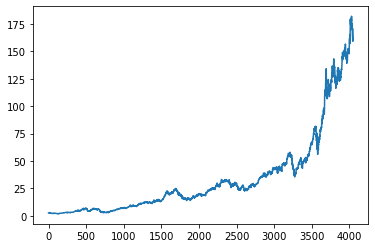

In [8]:
plt.plot(df.Close)

In [9]:
df

,High,Low,Open,Close,Volume
0,2.669643,2.580357,2.585000,2.669643,807234400.0
1,2.713571,2.660714,2.683214,2.677500,619603600.0
2,2.675000,2.633929,2.672500,2.656429,449422400.0
3,2.739286,2.662500,2.687500,2.725000,704457600.0
4,2.757143,2.705000,2.740357,2.716071,675040800.0
...,...,...,...,...,...
4042,162.300003,154.699997,160.020004,161.619995,162294600.0
4043,162.759995,157.020004,158.979996,159.779999,115798400.0
4044,164.389999,157.820007,163.500000,159.690002,108275300.0
4045,163.839996,158.279999,162.449997,159.220001,121954600.0


In [10]:
ma100 = df.Close.rolling(100).mean()

In [11]:
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4042    158.0223
4043    158.0950
4044    158.1554
4045    158.2046
4046    158.3410
Name: Close, Length: 4047, dtype: float64

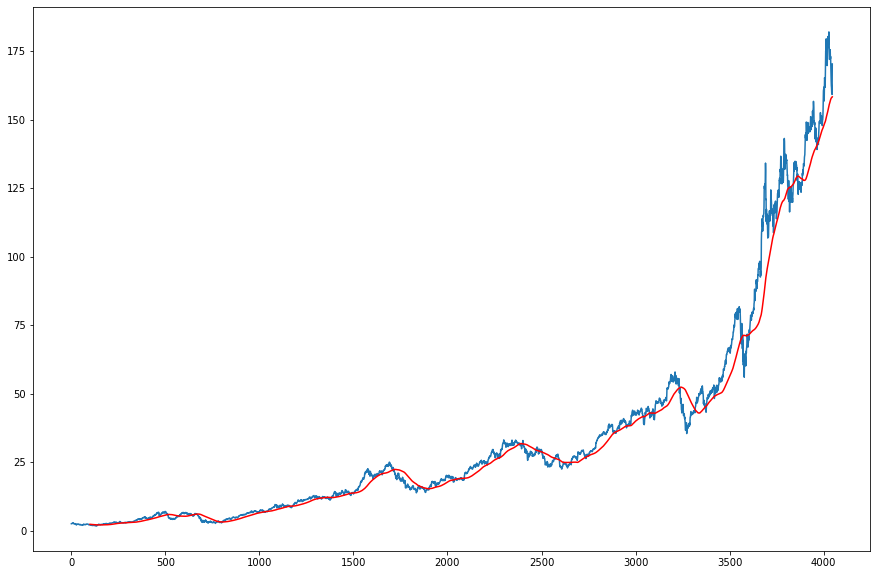

In [12]:
plt.figure(figsize = (15,10))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
4042    147.53270
4043    147.67540
4044    147.80170
4045    147.93765
4046    148.11680
Name: Close, Length: 4047, dtype: float64

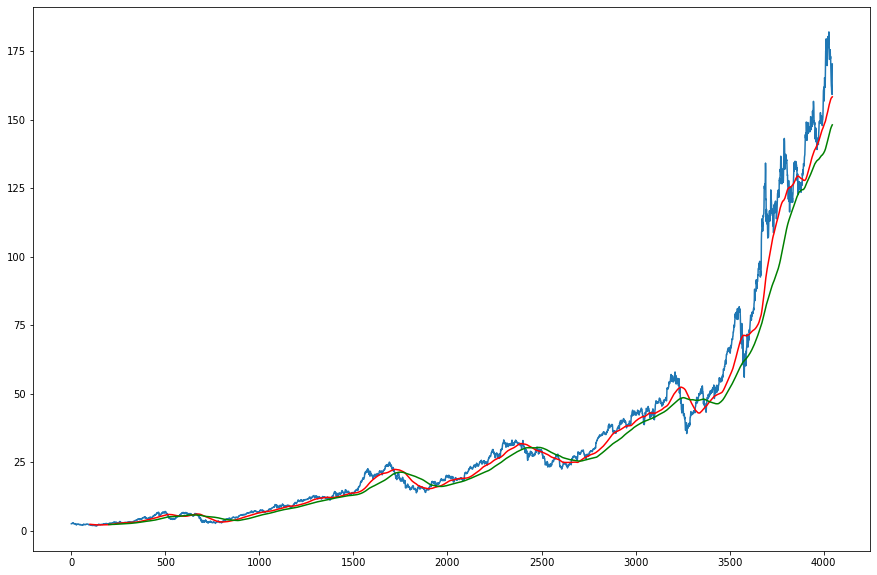

In [14]:
plt.figure(figsize = (15,10))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [15]:
df.shape

(4047, 5)

# Split data into Training and Testing set

In [16]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
print(data_training.shape)

(2832, 1)


In [17]:
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_testing.shape)


(1215, 1)


In [18]:
data_training.head()

,Close
0,2.669643
1,2.677500
2,2.656429
3,2.725000
4,2.716071


In [19]:
data_testing.head()

,Close
2832,36.192501
2833,36.005001
2834,35.915001
2835,35.834999
2836,35.792500


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02513124],
       [0.02536084],
       [0.0247451 ],
       ...,
       [0.99861192],
       [0.99663949],
       [0.99693166]])

In [22]:
data_training_array.shape

(2832, 1)

In [23]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train.shape

(2732, 100, 1)

# ML Model

In [ ]:
#from keras.layers import Dense, Dropout
from keras.models import Sequential

In [1]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences =True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences =True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

NameError: name 'Sequential' is not defined